<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [3]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

Problems slovlig tools = mencari akar permasalahan pada suatu masalah

5 why

metode mencari problems sloving dengan cara menanyakan apa penyebab permasalahaan muncul dan mencari jawabannya. hal ini di lakUkan berkali klai sampai permasalahan dapat tergambar dengan jelas

action priority 

diagram yang dapat di gunakan untuk mencari prioritas masalah berdasarkan impact atas benefit yang bisa diberikan dengan diagram ini kita memilih masalah yang impactnya mayoritas dari permasalahan yang ada.

fishbone digram 

digram yang dapat di gunakan untuk merinci masalah dan membantu mencari akar masalah yang dapat dilihat dari beberapa point of view

flowchart/algo

metode pemecahan masalah dengan cara memetakan flow atau membuat pseudo algoritma yang untuk menentukan masalah dan cara untuk mencari solusinya secara sistematis

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f2e26548-83d2-4bcf-bac3-6dc9db1cb12d,Nizar Rayyan,https://play-lh.googleusercontent.com/a-/ACB-R...,Paylater ngk bener.. selalu di batalkan otomat...,1,203,5.31.3,2023-04-16 23:03:31,"Hai, mohon maaf atas ketidaknyamanannya. Jika ...",2020-03-06 11:44:30,5.31.3
1,5ef5f760-f72a-473b-9fb3-48e5556cefc6,Fandy Komo,https://play-lh.googleusercontent.com/a/AGNmyx...,Tambah kesini buka lapak tambah kurang bagus p...,1,66,5.31.3,2023-05-05 02:37:25,None,NaT,5.31.3
2,9d6aac3b-63cf-4144-9b4e-c94d291d808a,dedy kelana (CV PRIBUMI BANGKIT),https://play-lh.googleusercontent.com/a/AGNmyx...,pastinya bukan hp dan wifi saya yang lemmooott...,1,223,5.30.2,2023-03-25 10:26:56,None,NaT,5.30.2
3,5576763d-7e2f-416b-b262-bcdb8945722c,hidayat mudaris,https://play-lh.googleusercontent.com/a-/ACB-R...,Tolong jangan memperumit untuk Verifikasi Akun...,1,38,5.30.2,2023-05-06 17:32:58,None,NaT,5.30.2
4,aaaefa58-4377-45af-a473-6be1e0168f32,ari sandy,https://play-lh.googleusercontent.com/a-/ACB-R...,"Aplikasi wadah untuk penipuan, sangat gampang ...",1,0,5.31.3,2023-05-15 05:55:23,None,NaT,5.31.3


In [5]:
len(df_busu.index) #count the number of data we got

1300

In [6]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,Pengguna Google,4,2019-06-06 12:39:33,Aplikasi makin berat bos.. saran jangan kebany...
1296,Pengguna Google,1,2019-09-13 08:47:45,"Applikasi Bukalapak sangat mengecewakan, setia..."
1297,Roofie Yk,3,2022-12-22 04:26:04,"Kenapa saya belum bisa menggunakan paylater,pa..."
1298,Anto Suhendra,5,2023-03-11 04:12:55,Tingkatkan lagi keamanan nya ya saya pake buka...
1299,Erwin Rusdiyanto,1,2023-02-23 10:21:30,"Haous az tuh lah paylaternya, percuma ada payl..."


In [7]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [8]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,Pengguna Google,4,2019-06-06 12:39:33,Aplikasi makin berat bos.. saran jangan kebany...
1296,Pengguna Google,1,2019-09-13 08:47:45,"Applikasi Bukalapak sangat mengecewakan, setia..."
1297,Roofie Yk,3,2022-12-22 04:26:04,"Kenapa saya belum bisa menggunakan paylater,pa..."
1298,Anto Suhendra,5,2023-03-11 04:12:55,Tingkatkan lagi keamanan nya ya saya pake buka...
1299,Erwin Rusdiyanto,1,2023-02-23 10:21:30,"Haous az tuh lah paylaternya, percuma ada payl..."


In [9]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [10]:
import nltk

In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [12]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Nizar Rayyan,1,2023-04-16 23:03:31,Paylater ngk bener.. selalu di batalkan otomat...
1,Fandy Komo,1,2023-05-05 02:37:25,Tambah kesini buka lapak tambah kurang bagus p...
2,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...
3,hidayat mudaris,1,2023-05-06 17:32:58,Tolong jangan memperumit untuk Verifikasi Akun...
4,ari sandy,1,2023-05-15 05:55:23,"Aplikasi wadah untuk penipuan, sangat gampang ..."


In [13]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [14]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [15]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [16]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [17]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [18]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [19]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o..."
1,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ..."
2,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l..."
3,hidayat mudaris,1,2023-05-06 17:32:58,tolong jangan memperumit untuk verifikasi akun...,"[tolong, jangan, memperumit, untuk, verifikasi..."
4,ari sandy,1,2023-05-15 05:55:23,aplikasi wadah untuk penipuan sangat gampang b...,"[aplikasi, wadah, untuk, penipuan, sangat, gam..."
...,...,...,...,...,...
1295,Pengguna Google,4,2019-06-06 12:39:33,aplikasi makin berat bos saran jangan kebanyak...,"[aplikasi, makin, berat, bos, saran, jangan, k..."
1296,Pengguna Google,1,2019-09-13 08:47:45,applikasi bukalapak sangat mengecewakan setiap...,"[applikasi, bukalapak, sangat, mengecewakan, s..."
1297,Roofie Yk,3,2022-12-22 04:26:04,kenapa saya belum bisa menggunakan paylaterpad...,"[kenapa, saya, belum, bisa, menggunakan, payla..."
1298,Anto Suhendra,5,2023-03-11 04:12:55,tingkatkan lagi keamanan nya ya saya pake buka...,"[tingkatkan, lagi, keamanan, nya, ya, saya, pa..."


In [20]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [21]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
331,Mohammad raflie,1,2023-05-15 11:54:03,makin kesini tambah jelek bukalapak banyak bug...,"[makin, kesini, tambah, jelek, bukalapak, bany..."
44,Eko Santoso,1,2023-05-15 11:38:16,promo gratis ongkir nya boongan belanja rb ga...,"[promo, gratis, ongkir, nya, boongan, belanja,..."
1264,Hanif Nirwanda,5,2023-05-15 11:25:35,susah klaim gratis ongkir sama pembayaran cod ...,"[susah, klaim, gratis, ongkir, sama, pembayara..."
347,Artsdigital Zone,1,2023-05-15 07:47:54,fitur chat buka bantuan ribet gada call center...,"[fitur, chat, buka, bantuan, ribet, gada, call..."
173,Hyang Arha,5,2023-05-15 07:34:51,untuk saat ini berjalan ok penjualan ok keuang...,"[untuk, saat, ini, berjalan, ok, penjualan, ok..."


In [22]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [23]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(tidak, 4), (di, 3), (nya, 3), (kadang, 2), (...
1    [(tambah, 3), (buka, 2), (susah, 2), (di, 2), ...
2    [(dan, 3), (saya, 3), (mau, 3), (yang, 2), (se...
3    [(ga, 4), (untuk, 3), (saldo, 3), (bisa, 3), (...
4    [(dan, 3), (pelapak, 3), (penipuan, 2), (melak...
Name: Ulasan_tokenize, dtype: object


In [24]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [paylater, ngk, bener, selalu, di, batalkan, o...
1       [tambah, kesini, buka, lapak, tambah, kurang, ...
2       [pastinya, bukan, hp, dan, wifi, saya, yang, l...
3       [tolong, jangan, memperumit, untuk, verifikasi...
4       [aplikasi, wadah, untuk, penipuan, sangat, gam...
                              ...                        
1295    [aplikasi, makin, berat, bos, saran, jangan, k...
1296    [applikasi, bukalapak, sangat, mengecewakan, s...
1297    [kenapa, saya, belum, bisa, menggunakan, payla...
1298    [tingkatkan, lagi, keamanan, nya, ya, saya, pa...
1299    [haous, az, tuh, lah, paylaternya, percuma, ad...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [25]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [26]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv (2).csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [27]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [28]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan..."
1,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ..."
2,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l..."
3,hidayat mudaris,1,2023-05-06 17:32:58,tolong jangan memperumit untuk verifikasi akun...,"[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, jangan, memperumit, untuk, verifikasi..."
4,ari sandy,1,2023-05-15 05:55:23,aplikasi wadah untuk penipuan sangat gampang b...,"[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, untuk, penipuan, sangat, gam..."
...,...,...,...,...,...,...
1295,Pengguna Google,4,2019-06-06 12:39:33,aplikasi makin berat bos saran jangan kebanyak...,"[aplikasi, makin, berat, bos, saran, jangan, k...","[aplikasi, makin, berat, bos, saran, jangan, k..."
1296,Pengguna Google,1,2019-09-13 08:47:45,applikasi bukalapak sangat mengecewakan setiap...,"[applikasi, bukalapak, sangat, mengecewakan, s...","[aplikasi, bukalapak, sangat, mengecewakan, se..."
1297,Roofie Yk,3,2022-12-22 04:26:04,kenapa saya belum bisa menggunakan paylaterpad...,"[kenapa, saya, belum, bisa, menggunakan, payla...","[kenapa, saya, belum, bisa, menggunakan, payla..."
1298,Anto Suhendra,5,2023-03-11 04:12:55,tingkatkan lagi keamanan nya ya saya pake buka...,"[tingkatkan, lagi, keamanan, nya, ya, saya, pa...","[tingkatkan, lagi, keamanan, nya, ya, saya, pa..."


In [29]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [paylater, enggak, benar, selalu, di, batalkan...
1       [tambah, kesini, buka, lapak, tambah, kurang, ...
2       [pastinya, bukan, hp, dan, wifi, saya, yang, l...
3       [tolong, jangan, memperumit, untuk, verifikasi...
4       [aplikasi, wadah, untuk, penipuan, sangat, gam...
                              ...                        
1295    [aplikasi, makin, berat, bos, saran, jangan, k...
1296    [aplikasi, bukalapak, sangat, mengecewakan, se...
1297    [kenapa, saya, belum, bisa, menggunakan, payla...
1298    [tingkatkan, lagi, keamanan, nya, ya, saya, pa...
1299    [haous, az, tuh, lah, paylaternya, percuma, ad...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [30]:
from nltk.corpus import stopwords

In [31]:
list_stopwords = stopwords.words('indonesian')

In [32]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [33]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga..."
1,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom..."
2,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b..."
3,hidayat mudaris,1,2023-05-06 17:32:58,tolong jangan memperumit untuk verifikasi akun...,"[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, memperumit, verifikasi, akun, saldo, ..."
4,ari sandy,1,2023-05-15 05:55:23,aplikasi wadah untuk penipuan sangat gampang b...,"[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, penipuan, gampang, banget, p..."
...,...,...,...,...,...,...,...
1295,Pengguna Google,4,2019-06-06 12:39:33,aplikasi makin berat bos saran jangan kebanyak...,"[aplikasi, makin, berat, bos, saran, jangan, k...","[aplikasi, makin, berat, bos, saran, jangan, k...","[aplikasi, berat, bos, saran, kebanyakan, fitu..."
1296,Pengguna Google,1,2019-09-13 08:47:45,applikasi bukalapak sangat mengecewakan setiap...,"[applikasi, bukalapak, sangat, mengecewakan, s...","[aplikasi, bukalapak, sangat, mengecewakan, se...","[aplikasi, bukalapak, mengecewakan, orderan, c..."
1297,Roofie Yk,3,2022-12-22 04:26:04,kenapa saya belum bisa menggunakan paylaterpad...,"[kenapa, saya, belum, bisa, menggunakan, payla...","[kenapa, saya, belum, bisa, menggunakan, payla...","[paylaterpadahal, tingkatkan, belanjaan, non, ..."
1298,Anto Suhendra,5,2023-03-11 04:12:55,tingkatkan lagi keamanan nya ya saya pake buka...,"[tingkatkan, lagi, keamanan, nya, ya, saya, pa...","[tingkatkan, lagi, keamanan, nya, ya, saya, pa...","[tingkatkan, keamanan, nya, ya, pakai, bukalap..."


In [34]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.5 MB/s eta 0:00:00


In [35]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.1 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16299 sha256=c43c3c10ccc29e59b0f74be3e1147aa8c7e771ba41d13e372ae0b6d3773f6686
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


In [36]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4514
------------------------
paylater : paylater
batalkan : batal
otomatis : otomatis
kadang : kadang
nya : nya
gantian : ganti
jatuh : jatuh
tempo : tempo
bayar : bayar
biaya : biaya
keterlambatan : lambat
layanan : layan
biar : biar
merasakan : rasa
rasakan : rasa
sistem : sistem
seenak : enak
chat : chat
susah : susah
error : error
menyalahkan : salah
bikin : bikin
pusing : pusing
kesini : kesini
buka : buka
lapak : lapak
bagus : bagus
pelayanannya : layan
komplan : komplan
banget : banget
beberapakali : beberapakali
transaksi : transaksi
rekening : rekening
deh : deh
kepotong : potong
lapaknya : lapak
terverifikasi : verifikasi
kalo : kalo
pengin : pengin
komplain : komplain
menu : menu
upload : upload
bukti : bukti
bayarnya : bayar
muncul : muncul
kali : kali
kehilangan : hilang
uang : uang
pembayaran : bayar
gagal : gagal
pastinya : pasti
hp : hp
wifi : wifi
lemmooottttt : lemmooottttt
dasarnya : dasar
bukalapak : bukalapak
karuan : karuan
lihat : lihat
status : status
transsaks

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [37]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [38]:
name_dataframe.to_excel("tokped_text.xlsx")

In [39]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [40]:
tokenize_ulasan = word_tokenize(ulasan)

In [41]:
tokenize_ulasan

['paylater',
 'batal',
 'otomatis',
 'kadang',
 'nya',
 'ganti',
 'jatuh',
 'tempo',
 'bayar',
 'biaya',
 'lambat',
 'biaya',
 'layan',
 'biar',
 'rasa',
 'rasa',
 'sistem',
 'enak',
 'nya',
 'chat',
 'susah',
 'kadang',
 'error',
 'salah',
 'layan',
 'nya',
 'bikin',
 'pusing',
 'ganti',
 'pusing',
 'kesini',
 'buka',
 'lapak',
 'bagus',
 'layan',
 'komplan',
 'susah',
 'susah',
 'banget',
 'beberapakali',
 'transaksi',
 'rekening',
 'deh',
 'potong',
 'buka',
 'lapak',
 'verifikasi',
 'kalo',
 'pengin',
 'komplain',
 'menu',
 'upload',
 'bukti',
 'bayar',
 'muncul',
 'kali',
 'kali',
 'hilang',
 'uang',
 'bayar',
 'gagal',
 'verifikasi',
 'pasti',
 'hp',
 'wifi',
 'lemmooottttt',
 'dasar',
 'bukalapak',
 'karuan',
 'lihat',
 'status',
 'transsaksi',
 'tunggu',
 'halaman',
 'isi',
 'penuh',
 'muncul',
 'tawar',
 'kadang',
 'tanda',
 'nya',
 'sulit',
 'baca',
 'pencet',
 'bulalapak',
 'main',
 'paket',
 'data',
 'orang',
 'konten',
 'webnya',
 'lumayan',
 'hasil',
 'moga',
 'curiga',
 

In [42]:
fqdist = FreqDist(tokenize_ulasan)

In [43]:
fqdist

FreqDist({'bukalapak': 503, 'aplikasi': 479, 'nya': 418, 'barang': 393, 'buka': 252, 'pakai': 249, 'kirim': 231, 'lapak': 226, 'bayar': 225, 'belanja': 219, ...})

In [44]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 503),
 ('aplikasi', 479),
 ('nya', 418),
 ('barang', 393),
 ('buka', 252),
 ('pakai', 249),
 ('kirim', 231),
 ('lapak', 226),
 ('bayar', 225),
 ('belanja', 219),
 ('beli', 196),
 ('transaksi', 189),
 ('bantu', 164),
 ('jual', 156),
 ('bagus', 152)]

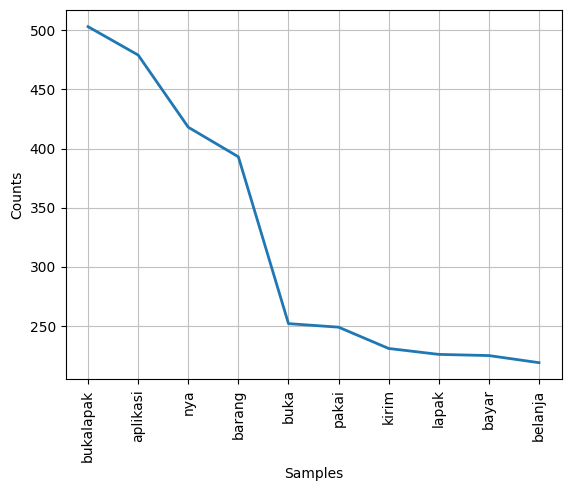

In [45]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [46]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0
1,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0
2,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b...","[pasti, hp, wifi, lemmooottttt, dasar, bukalap...",pasti hp wifi lemmooottttt dasar bukalapak kar...,0
3,hidayat mudaris,1,2023-05-06 17:32:58,tolong jangan memperumit untuk verifikasi akun...,"[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, memperumit, verifikasi, akun, saldo, ...","[tolong, rumit, verifikasi, akun, saldo, bukal...",tolong rumit verifikasi akun saldo bukalapak p...,0
4,ari sandy,1,2023-05-15 05:55:23,aplikasi wadah untuk penipuan sangat gampang b...,"[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, penipuan, gampang, banget, p...","[aplikasi, wadah, tipu, gampang, banget, tipu,...",aplikasi wadah tipu gampang banget tipu tim sy...,0
...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,4,2019-06-06 12:39:33,aplikasi makin berat bos saran jangan kebanyak...,"[aplikasi, makin, berat, bos, saran, jangan, k...","[aplikasi, makin, berat, bos, saran, jangan, k...","[aplikasi, berat, bos, saran, kebanyakan, fitu...","[aplikasi, berat, bos, saran, banyak, fitur, b...",aplikasi berat bos saran banyak fitur baik per...,1
1296,Pengguna Google,1,2019-09-13 08:47:45,applikasi bukalapak sangat mengecewakan setiap...,"[applikasi, bukalapak, sangat, mengecewakan, s...","[aplikasi, bukalapak, sangat, mengecewakan, se...","[aplikasi, bukalapak, mengecewakan, orderan, c...","[aplikasi, bukalapak, kecewa, order, customer,...",aplikasi bukalapak kecewa order customer kurir...,0
1297,Roofie Yk,3,2022-12-22 04:26:04,kenapa saya belum bisa menggunakan paylaterpad...,"[kenapa, saya, belum, bisa, menggunakan, payla...","[kenapa, saya, belum, bisa, menggunakan, payla...","[paylaterpadahal, tingkatkan, belanjaan, non, ...","[paylaterpadahal, tingkat, belanja, non, cod, ...",paylaterpadahal tingkat belanja non cod mohon ...,0
1298,Anto Suhendra,5,2023-03-11 04:12:55,tingkatkan lagi keamanan nya ya saya pake buka...,"[tingkatkan, lagi, keamanan, nya, ya, saya, pa...","[tingkatkan, lagi, keamanan, nya, ya, saya, pa...","[tingkatkan, keamanan, nya, ya, pakai, bukalap...","[tingkat, aman, nya, ya, pakai, bukalapak, bet...",tingkat aman nya ya pakai bukalapak betahun pi...,1


In [47]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [48]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0
1,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0
2,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b...","[pasti, hp, wifi, lemmooottttt, dasar, bukalap...",pasti hp wifi lemmooottttt dasar bukalapak kar...,0
3,hidayat mudaris,1,2023-05-06 17:32:58,tolong jangan memperumit untuk verifikasi akun...,"[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, memperumit, verifikasi, akun, saldo, ...","[tolong, rumit, verifikasi, akun, saldo, bukal...",tolong rumit verifikasi akun saldo bukalapak p...,0
4,ari sandy,1,2023-05-15 05:55:23,aplikasi wadah untuk penipuan sangat gampang b...,"[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, penipuan, gampang, banget, p...","[aplikasi, wadah, tipu, gampang, banget, tipu,...",aplikasi wadah tipu gampang banget tipu tim sy...,0


In [49]:
from textblob import TextBlob


In [50]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [51]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.000000,0.000000,Neutral
1,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0,0.000000,0.000000,Neutral
2,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b...","[pasti, hp, wifi, lemmooottttt, dasar, bukalap...",pasti hp wifi lemmooottttt dasar bukalapak kar...,0,0.166667,0.333333,Positive
3,hidayat mudaris,1,2023-05-06 17:32:58,tolong jangan memperumit untuk verifikasi akun...,"[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, memperumit, verifikasi, akun, saldo, ...","[tolong, rumit, verifikasi, akun, saldo, bukal...",tolong rumit verifikasi akun saldo bukalapak p...,0,-0.100000,0.600000,Negative
4,ari sandy,1,2023-05-15 05:55:23,aplikasi wadah untuk penipuan sangat gampang b...,"[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, penipuan, gampang, banget, p...","[aplikasi, wadah, tipu, gampang, banget, tipu,...",aplikasi wadah tipu gampang banget tipu tim sy...,0,0.000000,0.000000,Neutral


In [52]:
name_dataframe['month'] = name_dataframe['Date'].dt.month

In [53]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment,month
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.000000,0.000000,Neutral,4
1,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0,0.000000,0.000000,Neutral,5
2,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b...","[pasti, hp, wifi, lemmooottttt, dasar, bukalap...",pasti hp wifi lemmooottttt dasar bukalapak kar...,0,0.166667,0.333333,Positive,3
3,hidayat mudaris,1,2023-05-06 17:32:58,tolong jangan memperumit untuk verifikasi akun...,"[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, memperumit, verifikasi, akun, saldo, ...","[tolong, rumit, verifikasi, akun, saldo, bukal...",tolong rumit verifikasi akun saldo bukalapak p...,0,-0.100000,0.600000,Negative,5
4,ari sandy,1,2023-05-15 05:55:23,aplikasi wadah untuk penipuan sangat gampang b...,"[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, penipuan, gampang, banget, p...","[aplikasi, wadah, tipu, gampang, banget, tipu,...",aplikasi wadah tipu gampang banget tipu tim sy...,0,0.000000,0.000000,Neutral,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,4,2019-06-06 12:39:33,aplikasi makin berat bos saran jangan kebanyak...,"[aplikasi, makin, berat, bos, saran, jangan, k...","[aplikasi, makin, berat, bos, saran, jangan, k...","[aplikasi, berat, bos, saran, kebanyakan, fitu...","[aplikasi, berat, bos, saran, banyak, fitur, b...",aplikasi berat bos saran banyak fitur baik per...,1,0.256250,0.412500,Positive,6
1296,Pengguna Google,1,2019-09-13 08:47:45,applikasi bukalapak sangat mengecewakan setiap...,"[applikasi, bukalapak, sangat, mengecewakan, s...","[aplikasi, bukalapak, sangat, mengecewakan, se...","[aplikasi, bukalapak, mengecewakan, orderan, c...","[aplikasi, bukalapak, kecewa, order, customer,...",aplikasi bukalapak kecewa order customer kurir...,0,0.000000,0.000000,Neutral,9
1297,Roofie Yk,3,2022-12-22 04:26:04,kenapa saya belum bisa menggunakan paylaterpad...,"[kenapa, saya, belum, bisa, menggunakan, payla...","[kenapa, saya, belum, bisa, menggunakan, payla...","[paylaterpadahal, tingkatkan, belanjaan, non, ...","[paylaterpadahal, tingkat, belanja, non, cod, ...",paylaterpadahal tingkat belanja non cod mohon ...,0,0.000000,0.000000,Neutral,12
1298,Anto Suhendra,5,2023-03-11 04:12:55,tingkatkan lagi keamanan nya ya saya pake buka...,"[tingkatkan, lagi, keamanan, nya, ya, saya, pa...","[tingkatkan, lagi, keamanan, nya, ya, saya, pa...","[tingkatkan, keamanan, nya, ya, pakai, bukalap...","[tingkat, aman, nya, ya, pakai, bukalapak, bet...",tingkat aman nya ya pakai bukalapak betahun pi...,1,0.000000,0.000000,Neutral,3


In [54]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment,month
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.000000,0.000000,Neutral,4
1,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0,0.000000,0.000000,Neutral,5
2,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b...","[pasti, hp, wifi, lemmooottttt, dasar, bukalap...",pasti hp wifi lemmooottttt dasar bukalapak kar...,0,0.166667,0.333333,Positive,3
3,hidayat mudaris,1,2023-05-06 17:32:58,tolong jangan memperumit untuk verifikasi akun...,"[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, jangan, memperumit, untuk, verifikasi...","[tolong, memperumit, verifikasi, akun, saldo, ...","[tolong, rumit, verifikasi, akun, saldo, bukal...",tolong rumit verifikasi akun saldo bukalapak p...,0,-0.100000,0.600000,Negative,5
4,ari sandy,1,2023-05-15 05:55:23,aplikasi wadah untuk penipuan sangat gampang b...,"[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, untuk, penipuan, sangat, gam...","[aplikasi, wadah, penipuan, gampang, banget, p...","[aplikasi, wadah, tipu, gampang, banget, tipu,...",aplikasi wadah tipu gampang banget tipu tim sy...,0,0.000000,0.000000,Neutral,5


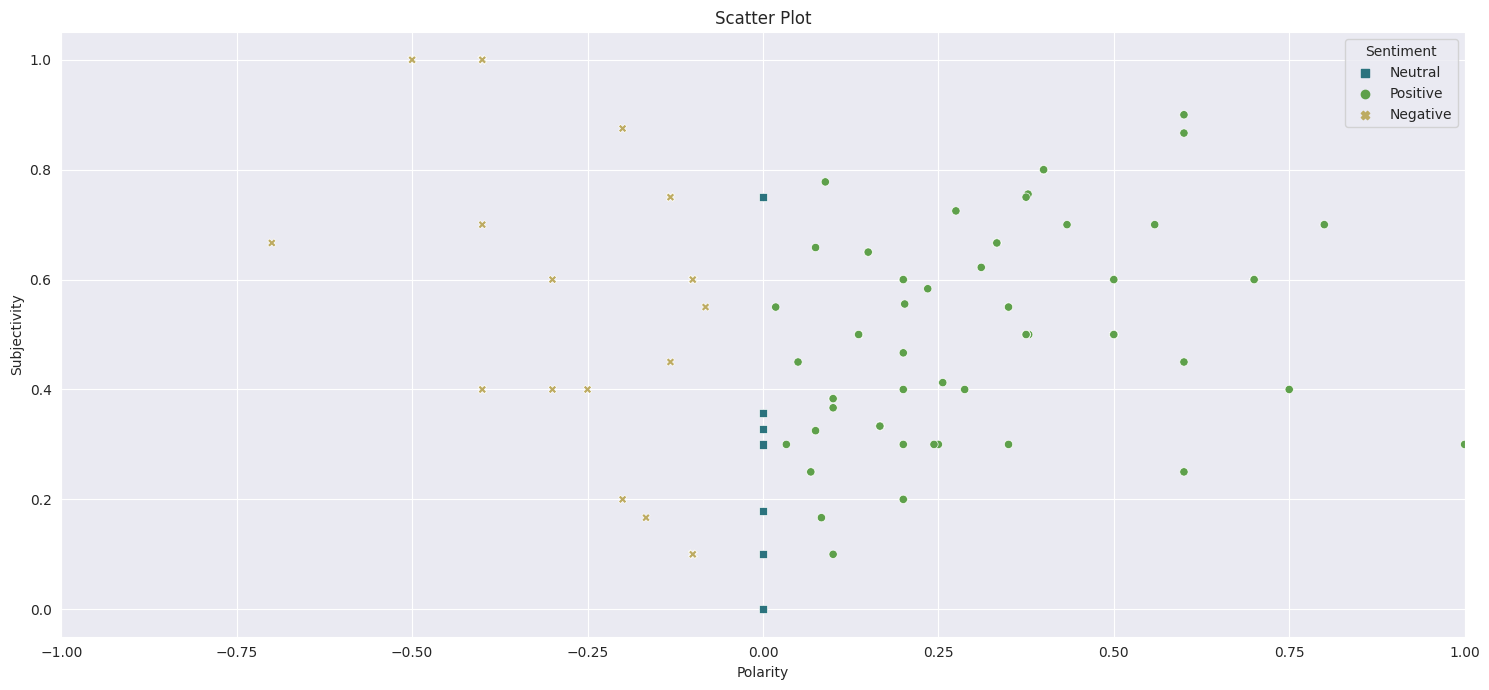

In [56]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

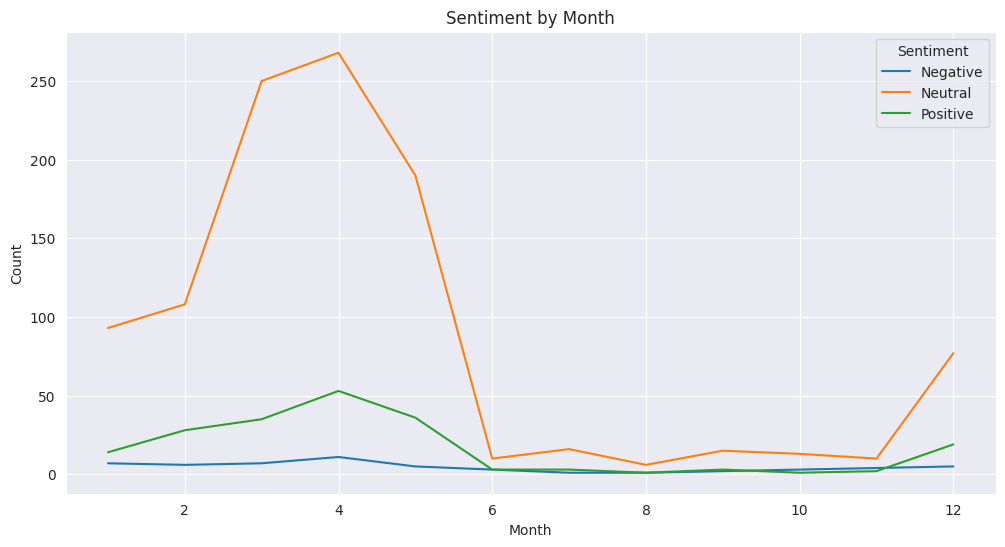

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and sentiment
sentiment_df = name_dataframe.groupby(['month', 'Sentiment']).size().reset_index(name='Count')


# Plot the sentiment counts by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Count', hue='Sentiment', data=sentiment_df)
plt.title('Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

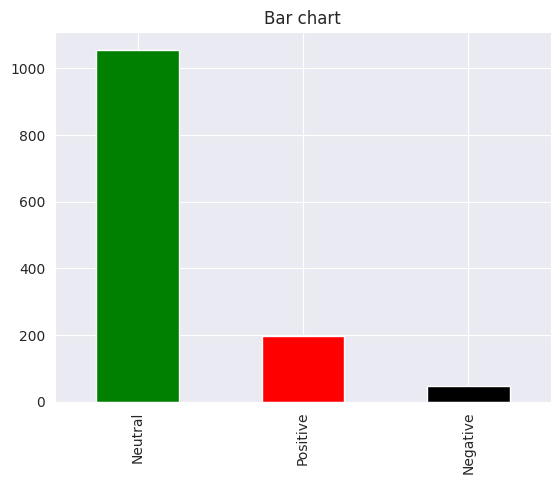

In [58]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [59]:
name_dataframe["Sentiment"].value_counts()

Neutral     1056
Positive     198
Negative      46
Name: Sentiment, dtype: int64

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [62]:
Ulasan = name_dataframe['Ulasan_clean']

In [63]:
Ulasan.isnull().sum()

0

In [64]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3639


In [65]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'paylater': 2438,
 'batal': 300,
 'otomatis': 2366,
 'kadang': 1442,
 'nya': 2276,
 'ganti': 1131,
 'jatuh': 1381,
 'tempo': 3275,
 'bayar': 309,
 'biaya': 438,
 'lambat': 1756,
 'layan': 1799,
 'biar': 434,
 'rasa': 2703,
 'sistem': 3080,
 'enak': 1020,
 'chat': 702,
 'susah': 3182,
 'error': 1036,
 'salah': 2843,
 'bikin': 446,
 'pusing': 2682,
 'kesini': 1565,
 'buka': 544,
 'lapak': 1771,
 'bagus': 219,
 'komplan': 1625,
 'banget': 255,
 'beberapakali': 319,
 'transaksi': 3411,
 'rekening': 2738,
 'deh': 822,
 'potong': 2614,
 'verifikasi': 3537,
 'kalo': 1458,
 'pengin': 2511,
 'komplain': 1623,
 'menu': 2058,
 'upload': 3512,
 'bukti': 603,
 'muncul': 2145,
 'kali': 1455,
 'hilang': 1257,
 'uang': 3472,
 'gagal': 1115,
 'pasti': 2431,
 'hp': 1271,
 'wifi': 3598,
 'lemmooottttt': 1818,
 'dasar': 805,
 'bukalapak': 557,
 'karuan': 1471,
 'lihat': 1852,
 'status': 3143,
 'transsaksi': 3423,
 'tunggu': 3459,
 'halaman': 1210,
 'isi': 1346,
 'penuh': 2530,
 'tawar': 3249,
 'tanda': 3

In [66]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 300)	1
  (0, 309)	1
  (0, 434)	1
  (0, 438)	2
  (0, 446)	1
  (0, 702)	1
  (0, 1020)	1
  (0, 1036)	1
  (0, 1131)	2
  (0, 1381)	1
  (0, 1442)	2
  (0, 1756)	1
  (0, 1799)	2
  (0, 2276)	3
  (0, 2366)	1
  (0, 2438)	1
  (0, 2682)	2
  (0, 2703)	2
  (0, 2843)	1
  (0, 3080)	1
  (0, 3182)	1
  (0, 3275)	1
  (1, 219)	1
  (1, 255)	1
  (1, 309)	2
  :	:
  (1296, 3176)	1
  (1296, 3385)	1
  (1297, 338)	1
  (1297, 452)	1
  (1297, 722)	1
  (1297, 1475)	1
  (1297, 2121)	1
  (1297, 2256)	1
  (1297, 2441)	1
  (1297, 3111)	1
  (1297, 3363)	1
  (1298, 99)	1
  (1298, 424)	1
  (1298, 557)	1
  (1298, 2276)	1
  (1298, 2392)	1
  (1298, 2580)	1
  (1298, 3363)	1
  (1298, 3617)	1
  (1299, 208)	1
  (1299, 1225)	1
  (1299, 2392)	1
  (1299, 2438)	1
  (1299, 2440)	1
  (1299, 3449)	1


In [67]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

kesini buka lapak bagus layan komplan susah susah banget beberapakali transaksi rekening deh potong buka lapak verifikasi kalo pengin komplain menu upload bukti bayar muncul kali kali hilang uang bayar gagal verifikasi


In [68]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 219)	1
  (0, 255)	1
  (0, 309)	2
  (0, 319)	1
  (0, 544)	2
  (0, 603)	1
  (0, 822)	1
  (0, 1115)	1
  (0, 1257)	1
  (0, 1455)	2
  (0, 1458)	1
  (0, 1565)	1
  (0, 1623)	1
  (0, 1625)	1
  (0, 1771)	2
  (0, 1799)	1
  (0, 2058)	1
  (0, 2145)	1
  (0, 2511)	1
  (0, 2614)	1
  (0, 2738)	1
  (0, 3182)	2
  (0, 3411)	1
  (0, 3472)	1
  (0, 3512)	1
  (0, 3537)	2


In [69]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[6.78459412 7.07227619 7.4777413  ... 6.78459412 7.4777413  7.4777413 ]
  (0, 3537)	0.3373602791108575
  (0, 3512)	0.18132995507607055
  (0, 3472)	0.14092956658994954
  (0, 3411)	0.11429315244746431
  (0, 3182)	0.2642710302899704
  (0, 2738)	0.18795151617964137
  (0, 2614)	0.170881906832965
  (0, 2511)	0.22607899527474637
  (0, 2145)	0.1577018915701436
  (0, 2058)	0.1569208284063539
  (0, 1799)	0.13136276179414066
  (0, 1771)	0.21793760400154688
  (0, 1625)	0.27157688751552755
  (0, 1623)	0.12637008522630935
  (0, 1565)	0.17705230639164105
  (0, 1458)	0.12704266069421902
  (0, 1455)	0.27520805167672013
  (0, 1257)	0.1525574228052941
  (0, 1115)	0.16369726410419133
  (0, 822)	0.15324921586108578
  (0, 603)	0.1938538847260694
  (0, 544)	0.20901638104952416
  (0, 319)	0.27157688751552755
  (0, 309)	0.22262542883982941
  (0, 255)	0.12670481605035974
  (0, 219)	0.11625676780725419


In [70]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [71]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-71-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [72]:
data_label.to_excel("data_label.xlsx")

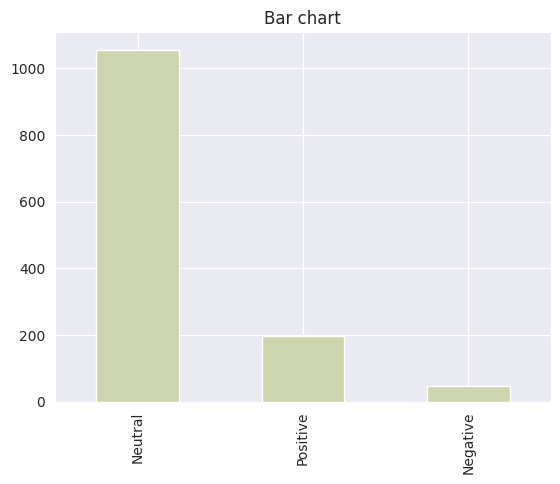

In [73]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

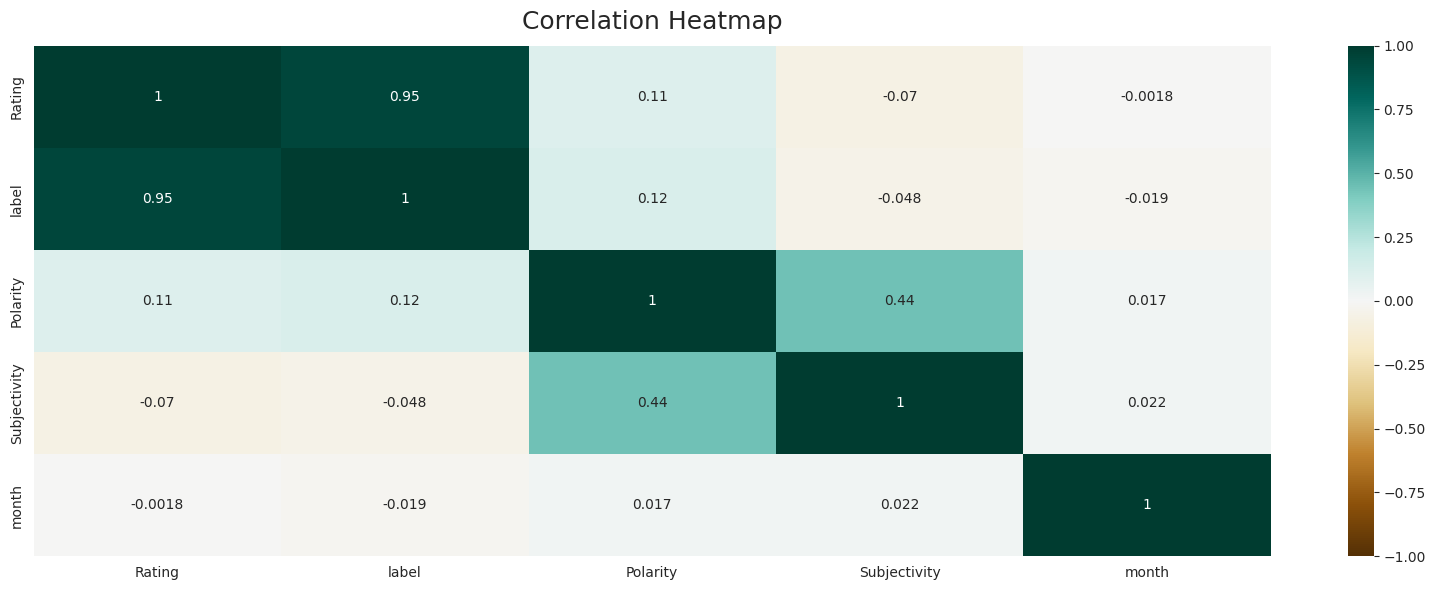

In [74]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [75]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment',
       'month'],
      dtype='object')

In [76]:
train_s3 = data_label[data_label["Sentiment"] == 'Neutral']

In [77]:
train_s3["Ulasan_clean"] = train_s3["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-77-0d6c2c4956f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s3["Ulasan_clean"] = train_s3["Ulasan_clean"].fillna("tidak ada komentar")


Neutral words


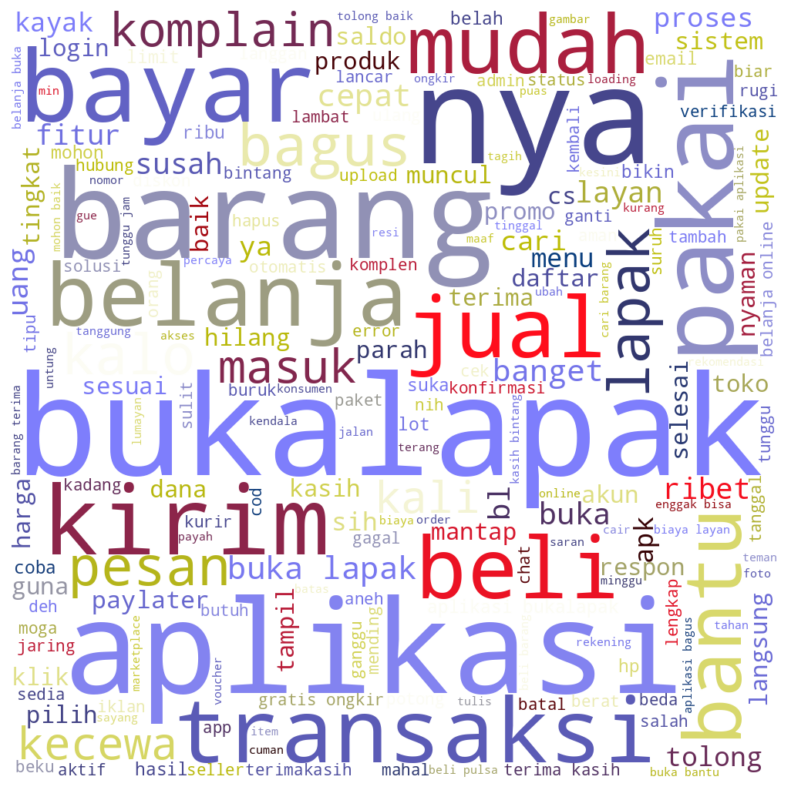

In [78]:
all_text_s0 = ' '.join(word for word in train_s3["Ulasan_clean"])
wordcloud = WordCloud(colormap='gist_stern', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Neutral words")
plt.show()

In [79]:
from wordcloud import WordCloud

In [80]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [81]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-81-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [82]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
3,hidayat mudaris,tolong rumit verifikasi akun saldo bukalapak p...,Negative
32,Afifur Rohman,aplikasi bagus minus ongkir mahal voucher paka...,Negative
65,Kaloka Galih Kayu Wangi,jual emas bukaemas susah banget banget problem...,Negative
67,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative
98,Sutris Trisno,guna setia bltp perlahan alih toko online lain...,Negative
102,Lemuel,mohon maaf kasih bintang alas hubung cs via ch...,Negative
145,eH boy,developer bukalapak lihat aplikasi shopee laza...,Negative
162,inaya putry26,aplikasi nya visa live chat maju bukalapak pes...,Negative
279,Achenk Chonsleth,lumayan bagus minus sedia menu layan varian pr...,Negative
293,Endi irawan,beli barang nonfisik chip game inti barang fis...,Negative


Negatif words


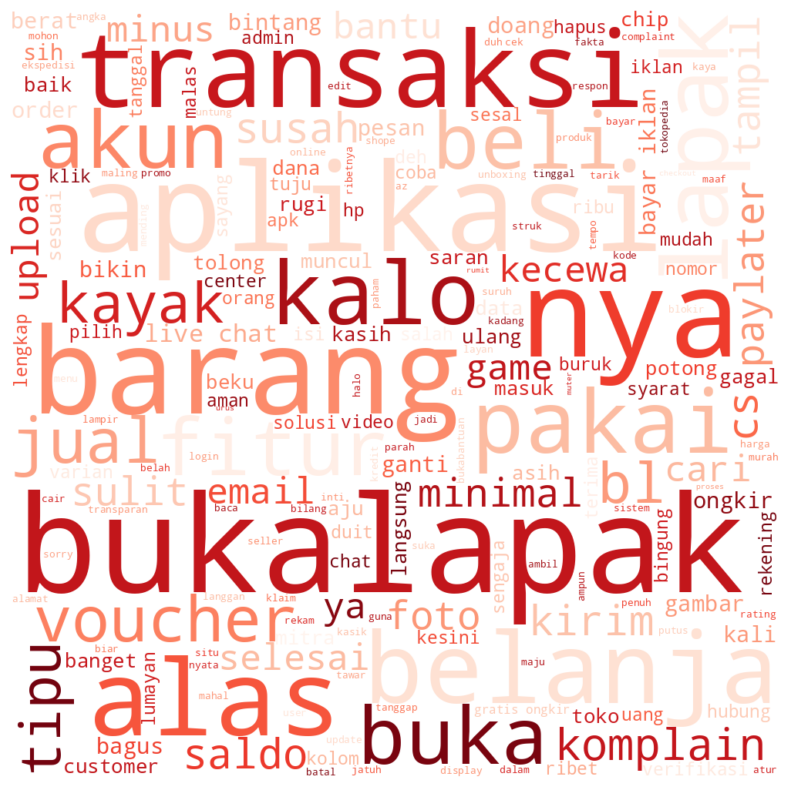

In [83]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Negatif words")
plt.show()

In [84]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [85]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-85-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [86]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
2,dedy kelana (CV PRIBUMI BANGKIT),pasti hp wifi lemmooottttt dasar bukalapak kar...,Positive
7,aji setiawan,aplikasi recomend respon live chat susah super...,Positive
12,Achmad Rifandi,payleter bayar lancar payleter nya pakai top u...,Positive
17,Muhammad Arsyad,mohon bantuannyasaya alami sulit logindikarena...,Positive
18,Reza Mahendra,lapak produk digital tanggal mei potongam supe...,Positive
...,...,...,...
1258,Ayas Baswi,bl fast lelet loading,Positive
1269,Eric 99,live chat lot respon,Positive
1282,Pengguna Google,alhamdulillah ubah aplikasi lelet banget user ...,Positive
1292,Agung Ace,upload barang muncul mesin pencar coba sesuai ...,Positive


Positif words


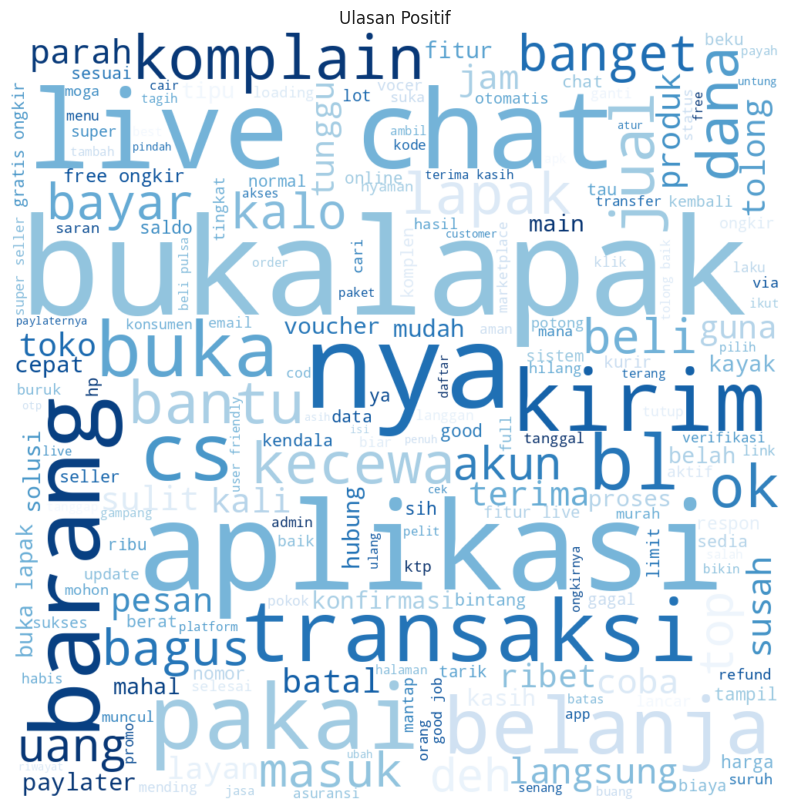

In [87]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
print("Positif words")
plt.show()

In [88]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-88-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [90]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [91]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_label['Ulasan_clean'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_label['Sentiment'], test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

# Evaluate the classifier on the testing set
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

# Use the classifier to predict the sentiment class for all reviews in the dataset
data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())

# Save the resulting dataframe to a new CSV file
data_label.to_csv('predicted_sentiment1.csv', index=False)

Accuracy: 0.5576923076923077


<ipython-input-91-35ea0f31f4f4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())


In [92]:
import numpy as np

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen 
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [126]:
data_label['predicted_sentiment_class'].value_counts()

Neutral     868
Positive    326
Negative    106
Name: predicted_sentiment_class, dtype: int64

<Axes: >

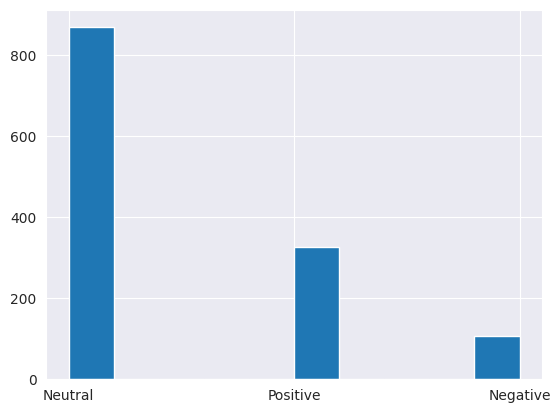

In [127]:
data_label['predicted_sentiment_class'].hist()

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**sample random**

mengambil secara acak dari daftar sample atau sampling frame yang tersedia setiap individu memiliki peluang yang sama untuk terpilih
peluang tersebut ada melakukan peluang sama ketika mempunyai data besar akan memliki peluang lebih besar untuk terpilih tetapi sebaliknya ketika mempunyai data dikit dapat peluang lebih sedikit

In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create the Naive Bayes Classifier object
gnb = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)

# Fit the classifier to the training data
gnb.fit(X_train.toarray(), y_train)

# Predict the sentiment of the test data
y_pred = gnb.predict(X_test.toarray())

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Cross-validation scores: [0.55128205 0.58119658 0.64102564 0.58119658 0.55128205]
Confusion Matrix:
 [[ 0  2  2]
 [ 8 69 29]
 [ 1 11  8]]


In [97]:
# Convert sparse matrix to dense numpy array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Print the scores on the training and test sets
print('Training set score: {:.4f}'.format(gnb.score(X_train_dense, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_dense, y_test)))


Training set score: 0.8803
Test set score: 0.5923


In [98]:
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5923076923076923


In [99]:
vectorizer

TfidfVectorizer()

In [100]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

In [101]:
data_label

,Nama pengguna,Ulasan_clean,Sentiment,predicted_sentiment_class
0,Nizar Rayyan,paylater batal otomatis kadang nya ganti jatuh...,Neutral,Neutral
1,Fandy Komo,kesini buka lapak bagus layan komplan susah su...,Neutral,Neutral
2,dedy kelana (CV PRIBUMI BANGKIT),pasti hp wifi lemmooottttt dasar bukalapak kar...,Positive,Positive
3,hidayat mudaris,tolong rumit verifikasi akun saldo bukalapak p...,Negative,Negative
4,ari sandy,aplikasi wadah tipu gampang banget tipu tim sy...,Neutral,Neutral
...,...,...,...,...
1295,Pengguna Google,aplikasi berat bos saran banyak fitur baik per...,Positive,Positive
1296,Pengguna Google,aplikasi bukalapak kecewa order customer kurir...,Neutral,Neutral
1297,Roofie Yk,paylaterpadahal tingkat belanja non cod mohon ...,Neutral,Neutral
1298,Anto Suhendra,tingkat aman nya ya pakai bukalapak betahun pi...,Neutral,Neutral


In [102]:
cm = confusion_matrix(y_test,y_pred)

In [103]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred))

--------------------- confusion matrix  ----------------------------
[[ 0  2  2]
 [ 8 69 29]
 [ 1 11  8]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.84      0.65      0.73       106
    Positive       0.21      0.40      0.27        20

    accuracy                           0.59       130
   macro avg       0.35      0.35      0.34       130
weighted avg       0.72      0.59      0.64       130



In [104]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [105]:
# print classification error kesalahan klasifikasi 

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1266


In [106]:

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8734


<Axes: >

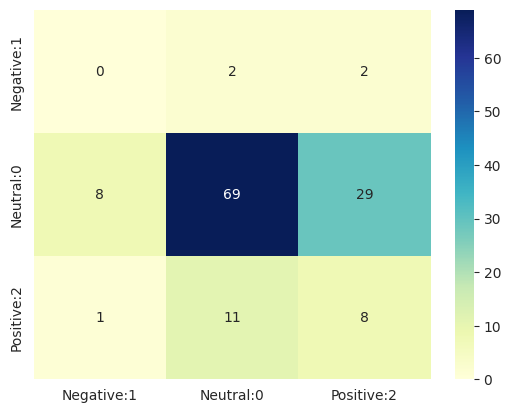

In [107]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [108]:
X_test

<130x3360 sparse matrix of type '<class 'numpy.float64'>'
	with 1540 stored elements in Compressed Sparse Row format>

In [109]:
X_train

<1170x3360 sparse matrix of type '<class 'numpy.float64'>'
	with 16218 stored elements in Compressed Sparse Row format>

In [110]:
y_test

379      Neutral
564      Neutral
455      Neutral
1222     Neutral
481      Neutral
          ...   
572      Neutral
506     Positive
955      Neutral
1055    Positive
111      Neutral
Name: Sentiment, Length: 130, dtype: object

In [111]:
y_train

244     Neutral
877     Neutral
345     Neutral
560     Neutral
723     Neutral
         ...   
213     Neutral
271     Neutral
1064    Neutral
911     Neutral
1203    Neutral
Name: Sentiment, Length: 1170, dtype: object

In [112]:
print(y_train)

244     Neutral
877     Neutral
345     Neutral
560     Neutral
723     Neutral
         ...   
213     Neutral
271     Neutral
1064    Neutral
911     Neutral
1203    Neutral
Name: Sentiment, Length: 1170, dtype: object


<Axes: >

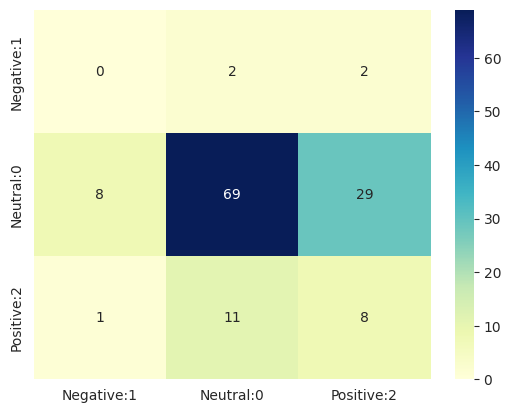

In [113]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [114]:
cm = confusion_matrix(y_test,y_pred)

In [115]:

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 0  2  2]
 [ 8 69 29]
 [ 1 11  8]]


In [116]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [118]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [119]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [120]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [121]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.87      1.00      0.93       106
    Positive       1.00      0.40      0.57        20

    accuracy                           0.88       130
   macro avg       0.62      0.47      0.50       130
weighted avg       0.86      0.88      0.85       130

--------------------- SVM ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.85      1.00      0.92       106
    Positive       1.00      0.30      0.46        20

    accuracy                           0.86       130
   macro avg       0.62      0.43      0.46       130
weighted avg       0.85      0.86      0.82       130



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif